In [109]:
import numpy as np
import pandas as pd

# Importing the dataset
iris = pd.read_excel('/content/iris.xls')

# Understanding the data:

In [110]:
iris.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
iris.shape

(150, 5)

In [113]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [114]:
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
iris.groupby('Classification').size()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [115]:
#checking null values
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [116]:
#Replacing missing values in 'SL'
mean_SL=iris['SL'].mean()
iris['SL']= iris['SL'].fillna(mean_SL)
#checking null values for 'SL'
iris.isnull().sum()


SL                0
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [117]:
#Replacing missing values in 'SW'
mean_SW=iris['SW'].mean()
iris['SW']= iris['SW'].fillna(mean_SW)
#checking null values for 'SW'
iris.isnull().sum()

SL                0
SW                0
PL                6
PW                0
Classification    0
dtype: int64

In [118]:
#Replacing missing values in 'PL'
mean_PL=iris['PL'].mean()
iris['PL']= iris['PL'].fillna(mean_PL)
#checking null values for 'PL'
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [119]:
#check for duplicate values
iris[iris.duplicated(keep='first')]


,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [120]:
#dropping duplicate values
iris.drop_duplicates(inplace=True)

In [121]:
#check for duplicate values
iris[iris.duplicated(keep='first')]

,SL,SW,PL,PW,Classification


There are no duplicate values in the dataset

In [122]:
iris.shape

(147, 5)

# Dividing data into features and labels

In [123]:
feature_columns = ['SL', 'SW', 'PL','PW']
X = iris[feature_columns].values
y = iris['Classification'].values

# Encoding Categorical Variable

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting dataset into training set and test set

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. K-Nearest Neighbors

### Fit the model

In [126]:
# Fitting clasifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Testing the KNN algorithm on the Testing Data

In [127]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate the model

In [128]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.56 %.


# Confusion Matrix

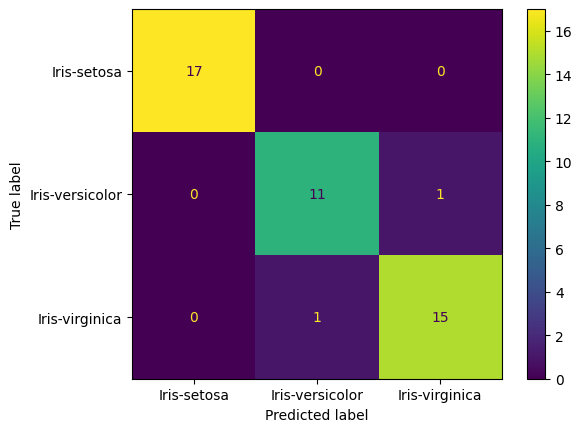

In [129]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

# 2.Logistic Regression

## Fitting Logistic Regression to the Training set :

In [130]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
# Predicting the Test set results
y_pred = lr.predict(X_test)

In [132]:
# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)*100

# Print the prediction accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 93.33 %.


# Confusion Matrix

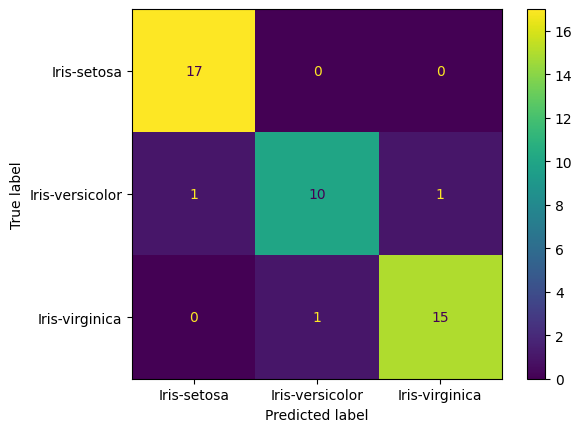

In [133]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

# 3. Decision Tree Model

# Build Decision Tree Model

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluating the Model

In [135]:
# Model Accuracy, how often is the classifier correct?

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)*100

# Print the prediction accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.56 %.


# Confusion Matrix

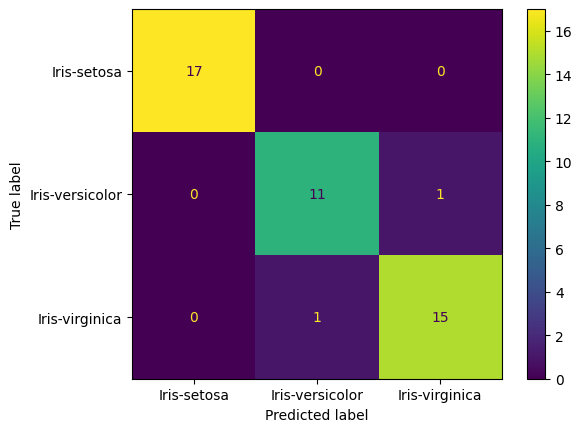

In [136]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

# 4.Model using Random Forest classifier

In [137]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

## Metrics

In [138]:
# Check accuracy score

from sklearn.metrics import accuracy_score
# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred)*100

# Print the prediction accuracy
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.56 %.


# Confusion Matrix

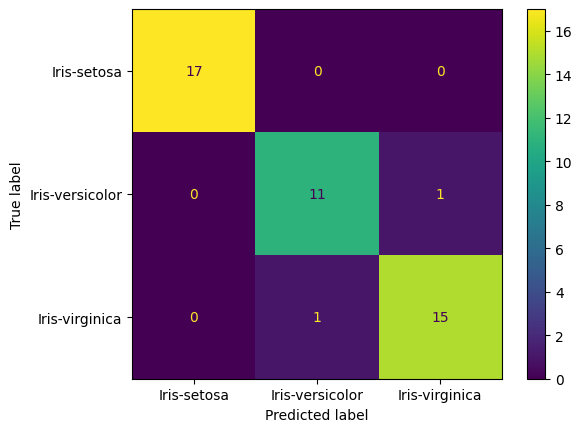

In [139]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels=['Iris-setosa','Iris-versicolor','Iris-virginica']

# Calculate the Confusion Matrix:
# calculates the confusion matrix by comparing the
#true labels (y_test) with the predicted labels (y_pred) generated by your classification model.

result=confusion_matrix(y_test,y_pred)
result


#Calculate the Accuracy Score
score=accuracy_score(y_test,y_pred)
score

#Create a Confusion Matrix Display Object:
#using the confusion matrix (result) and specifying the class labels to be displayed on the plot.
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
#Plot the Confusion Matrix
cmd.plot()

The above classification algorithms (K-nearest neighbors, Logistic Regression, Decision Tree , Random Forest ) are used to compare their performance using the IRIS dataset. The results of the comparison analysis showed that the K-nearest neighbors,Decision Tree, and Random Forest Algorithms performed better than Logistic Regression. An accuracy of 96% showed that all of the trained models of K-nearest neighbors, Decision Tree, and Random Forest Algorithms were able to classify the iris plant species correctly.